<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
pip install pygam

In [40]:
pip install graphviz

In [60]:
import pandas as pd        
from pygam import LogisticGAM
from matplotlib import pyplot as plt
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, precision_recall_curve) 
from sklearn.model_selection import train_test_split
import pymc3 as pm
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
df = pd.read_csv('overload.csv')
#df = df.assign(const=1)
X = df[['CEN','NES','NOR','NTE','OCC','ORI','PEN','CEN_min','NES_min','NOR_min','NTE_min','OCC_min','ORI_min','PEN_min']] ## Predictors
#Xalpha = df[['our','over','remove','internet','free','business','hpl','admiration','dolar','longest','total','hp','george','n1999','re','edu']] ## Predictors
y = df['L3']

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.66, random_state = 5)

df.sample(5)
df.describe()

,Unnamed: 0,Num,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20,L21,L22,L23,L24,L25,L26,L27,L28,L29,L30,L31,L32,L33,L34,L35,L36,L37,L38,...,L89,L90,L91,L92,L93,L94,L95,L96,L97,L98,L99,L100,L101,L102,L103,L104,L105,L106,CEN,ORI,OCC,NOR,NTE,NES,PEN,GUA,WE2,PEE,BEL,CEN_min,ORI_min,OCC_min,NOR_min,NTE_min,NES_min,PEN_min,GUA_min,WE2_min,PEE_min,BEL_min
count,335.0000,335.000000,335.0,335.000000,335.000000,335.0,335.000000,335.000000,335.000000,335.0,335.0,335.0,335.0,335.0,335.0,335.000000,335.000000,335.0,335.0,335.0,335.000000,335.000000,335.0,335.000000,335.0,335.000000,335.0,335.0,335.0,335.000000,335.0,335.0,335.000000,335.000000,335.000000,335.0,335.000000,335.0,335.000000,335.000000,...,335.0,335.000000,335.0,335.000000,335.000000,335.000000,335.000000,335.0,335.0,335.0,335.0,335.000000,335.0,335.0,335.000000,335.00000,335.000000,335.0,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.0,335.0,335.0
mean,167.0000,207.558209,0.0,0.020896,0.564179,0.0,0.119403,0.376119,0.435821,0.0,0.0,0.0,0.0,0.0,0.0,0.008955,0.020896,0.0,0.0,0.0,0.047761,0.026866,0.0,0.217910,0.0,0.002985,0.0,0.0,0.0,0.002985,0.0,0.0,0.232836,0.065672,0.029851,0.0,0.020896,0.0,0.008955,0.423881,...,0.0,0.170149,0.0,0.749254,0.749254,0.504478,0.504478,0.0,0.0,0.0,0.0,0.008955,0.0,0.0,0.029851,0.01194,0.077612,0.0,3531.016257,-734.349597,3447.496281,-398.745606,587.670704,-3712.398660,515.603887,174.177621,29.793949,29.793949,29.793949,1678.982731,-2222.907749,1845.443134,-1045.121707,-570.474549,-5481.648493,183.962728,107.731460,0.0,0.0,0.0
std,96.8504,98.931093,0.0,0.143249,0.496606,0.0,0.324747,0.485135,0.496606,0.0,0.0,0.0,0.0,0.0,0.0,0.094348,0.143249,0.0,0.0,0.0,0.213580,0.161933,0.0,0.413444,0.0,0.054636,0.0,0.0,0.0,0.054636,0.0,0.0,0.423271,0.248078,0.170430,0.0,0.143249,0.0,0.094348,0.494911,...,0.0,0.376326,0.0,0.434091,0.434091,0.500728,0.500728,0.0,0.0,0.0,0.0,0.094348,0.0,0.0,0.170430,0.10878,0.267960,0.0,431.457293,670.089562,732.043225,676.016881,562.790563,920.126065,619.126820,537.710521,545.318809,545.318809,545.318809,280.700271,489.156797,723.876677,356.460072,199.639984,491.556047,292.741960,14.709865,0.0,0.0,0.0
min,0.0000,25.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,2705.591000,-1694.139000,2002.898000,-1242.877000,89.691000,-5038.948000,21.336000,114.000000,0.000000,0.000000,0.000000,0.000000,-3409.860000,0.000000,-1710.495000,-998.826000,-6282.699000,-248.764000,0.000000,0.0,0.0,0.0
25%,83.5000,122.500000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.500000,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,3384.032500,-953.392000,2983.881500,-718.417500,401.472000,-4170.805000,225.004000,139.000000,0.000000,0.000000,0.000000,1539.116500,-2573.634500,1310.903500,-1337.659500,-723.338500,-5741.964500,-40.723000,108.728000,0.0,0.0,0.0
50%,167.0000,206.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,3523.580000,-777.844000,3651.682000,-434.835000,547.926000,-3672.697

In [43]:
#Fit a model with the default parameters
X_train1 = X_train[['CEN','NES','NOR','NTE','OCC','ORI','PEN','CEN_min','NES_min','NOR_min','NTE_min','OCC_min','ORI_min','PEN_min']]
X_test1 = X_test[['CEN','NES','NOR','NTE','OCC','ORI','PEN','CEN_min','NES_min','NOR_min','NTE_min','OCC_min','ORI_min','PEN_min']]
gam = LogisticGAM().fit(X_train1, y_train)

did not converge


In [44]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      7.9935
Link Function:                        LogitLink Log Likelihood:                                   -46.2975
Number of Samples:                          113 AIC:                                              108.5822
                                                AICc:                                             110.3272
                                                UBRE:                                               3.0175
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4086
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [45]:
gam.accuracy(X_test1, y_test)

0.7972972972972973

In [46]:
#compute confussion matrix 
confussion_matrix = confusion_matrix(y_test, gam.predict(X_test1))
confussion_matrix

array([[ 56,  35],
       [ 10, 121]])

<Figure size 432x288 with 0 Axes>

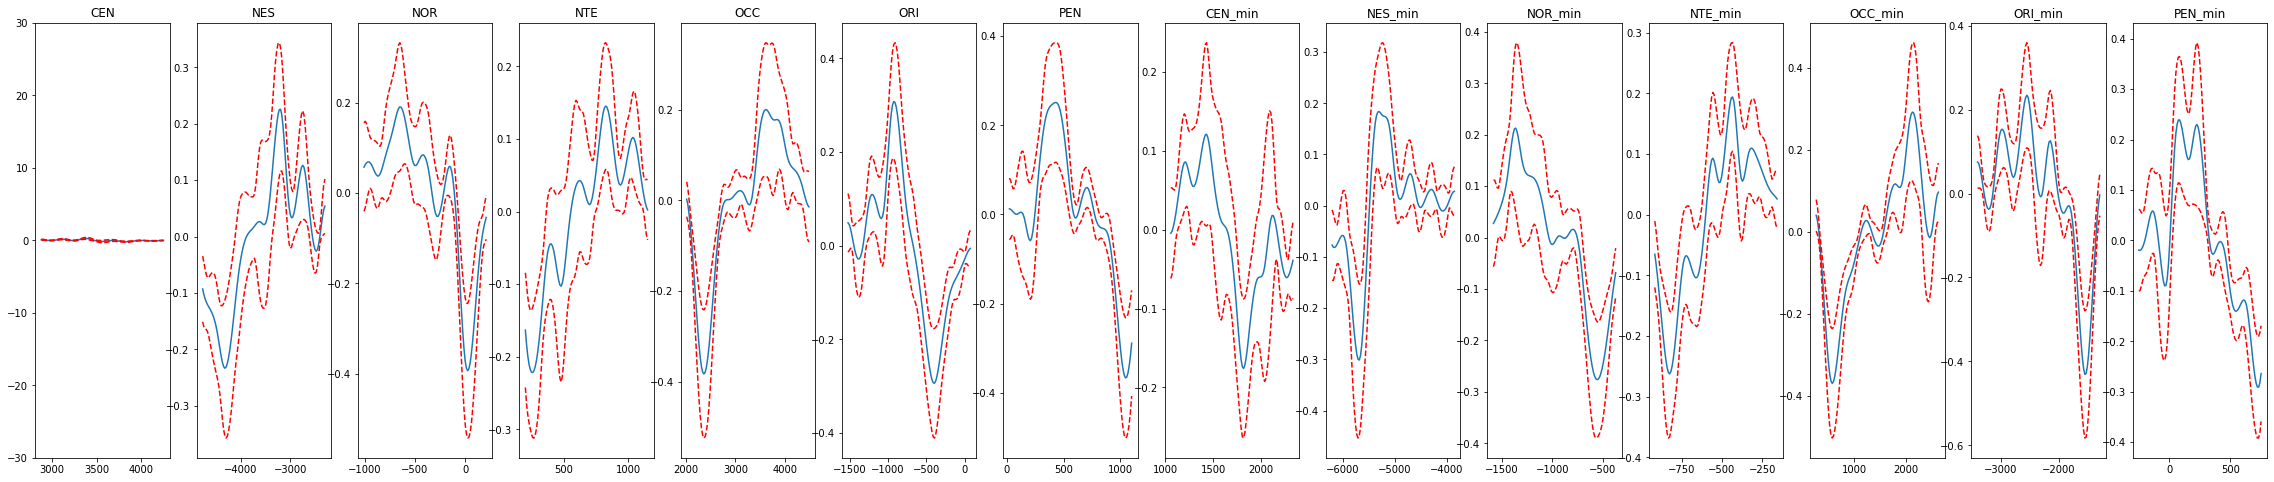

In [47]:
titles = X_test1.columns[0:15]
plt.figure()
fig, axs = plt.subplots(1, 14, figsize=(40, 8))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
        
plt.show()

## Árboles de decisión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


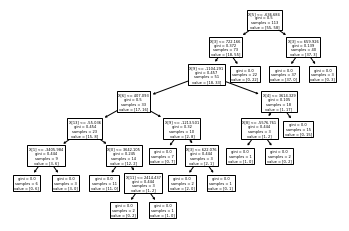

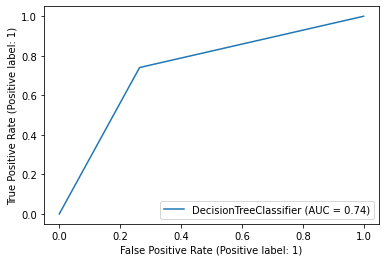

In [48]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_leaf_nodes=17)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

In [49]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("spam") 

'spam.pdf'

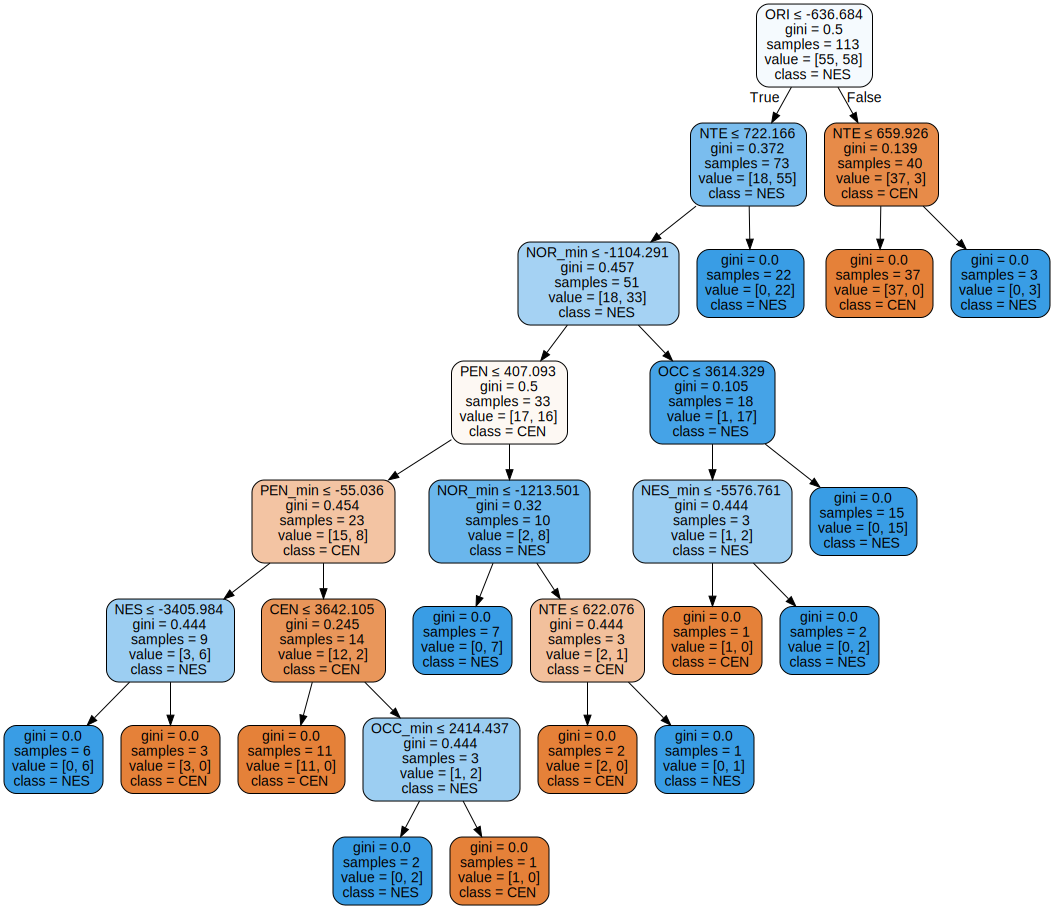

In [50]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_test.columns.values.tolist(),
                                class_names=X_test.columns.values.tolist(),
                                filled=True, 
                                rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [51]:
#compute confussion matrix 
confussion_matrix = confusion_matrix(y_test, clf.predict(X_test))
confussion_matrix

array([[67, 24],
       [34, 97]])

## Regresión logística bayesiana

In [76]:
model = sm.Logit(y_train, X_train)
results = model.fit()
logit_result_prediction = results.predict(X_test)
print(results.summary())
#convert y_score into binary decisions    
y_pred = [1 if x > 0.5 else 0 for x in logit_result_prediction]
#compute confussion matrix 
fourth_model_confussion_matrix = confusion_matrix(y_test, y_pred)
fourth_model_confussion_matrix

Optimization terminated successfully.
         Current function value: 0.317865
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                     L3   No. Observations:                  113
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                           13
Date:                Tue, 01 Mar 2022   Pseudo R-squ.:                  0.5412
Time:                        20:31:57   Log-Likelihood:                -35.919
converged:                       True   LL-Null:                       -78.286
Covariance Type:            nonrobust   LLR p-value:                 1.407e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CEN           -0.0019      0.005     -0.351      0.726      -0.013       0.009
NES            0.0015      0.

array([[ 70,  21],
       [ 27, 104]])

[A Tour of pyGAM](https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html)

[A example of pyGAM](https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f)

[documentación pyGAM](https://pygam.readthedocs.io/en/latest/)

[pyGAM : Getting Started with Generalized Additive Models in Python](https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f)

[Building interpretable models with Generalized additive models in Python](https://medium.com/just-another-data-scientist/building-interpretable-models-with-generalized-additive-models-in-python-c4404eaf5515)

[Scikit Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

[Post pruning decision trees with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)

[Understanding the decision tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)